In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

# Creating DataFrame

In [2]:
df = pd.read_csv("global_laptop_selling_data.csv")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Categorical Columns

In [4]:
categorical_columns = df.select_dtypes(include='object').columns

In [5]:
categorical_columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

## Unique Values

In [6]:
for col in df.columns:
    print(f"{col}: {list(df[col].unique())}")

laptop_ID: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 

In [7]:
df.drop(['laptop_ID', 'Product'], axis=1, inplace=True)
df.rename(columns={'Price_euros': 'Price'}, inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Cleaning

## Ram

In [9]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

## Weight

In [11]:
df['Weight'].unique()[:50]

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg'], dtype=object)

In [12]:
df['Weight'] = df['Weight'].replace('kg', '', regex=True).astype(float)
df['Weight'].head().unique()

array([1.37, 1.34, 1.86, 1.83])

## ScreenResolution

### Resolution

In [13]:
df[['ResolutionX', 'ResolutionY']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)

### Touchscreen

In [14]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen')

### IPS Panel

In [15]:
df['IPS_Panel'] = df['ScreenResolution'].str.contains(r'(IPS Panel Retina Display|IPS Panel)', regex=True)

In [16]:
df[['ResolutionX', 'ResolutionY', 'Touchscreen', 'IPS_Panel', 'ScreenResolution']].iloc[15:25,:]

,ResolutionX,ResolutionY,Touchscreen,IPS_Panel,ScreenResolution
15,2560,1600,False,True,IPS Panel Retina Display 2560x1600
16,1920,1080,False,False,Full HD 1920x1080
17,2880,1800,False,True,IPS Panel Retina Display 2880x1800
18,1920,1080,False,False,Full HD 1920x1080
19,1920,1080,True,True,IPS Panel Full HD / Touchscreen 1920x1080
20,1366,768,False,False,1366x768
21,1920,1080,False,True,IPS Panel Full HD 1920x1080
22,1366,768,False,False,1366x768
23,1920,1080,True,False,Full HD / Touchscreen 1920x1080
24,1920,1080,False,False,Full HD 1920x1080


In [17]:
df.drop(['ScreenResolution'], axis=1, inplace=True) # As all information extracted

## Memory

In [18]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [19]:
df['Memory'].replace({'1TB':'1024GB', '1.0TB':'1024GB', '2TB':'2048GB'}, regex=True, inplace=True)
df['Memory'].replace({'Flash Storage':'SSD', 'Hybrid':'HDD'}, regex=True, inplace=True)
list(df['Memory'].unique())

['128GB SSD',
 '256GB SSD',
 '512GB SSD',
 '500GB HDD',
 '1024GB HDD',
 '32GB SSD',
 '128GB SSD +  1024GB HDD',
 '256GB SSD +  256GB SSD',
 '64GB SSD',
 '256GB SSD +  1024GB HDD',
 '256GB SSD +  2048GB HDD',
 '2048GB HDD',
 '512GB SSD +  1024GB HDD',
 '1024GB SSD',
 '256GB SSD +  500GB HDD',
 '128GB SSD +  2048GB HDD',
 '512GB SSD +  512GB SSD',
 '16GB SSD',
 '512GB SSD +  256GB SSD',
 '512GB SSD +  2048GB HDD',
 '64GB SSD +  1024GB HDD',
 '180GB SSD',
 '1024GB HDD +  1024GB HDD',
 '32GB HDD',
 '1024GB SSD +  1024GB HDD',
 '128GB HDD',
 '240GB SSD',
 '8GB SSD',
 '508GB HDD']

In [20]:
df['Memory'].replace({
    '256GB SSD \+  256GB SSD': '512GB SSD',
    '512GB SSD \+  256GB SSD': '768GB SSD',
    '512GB SSD \+  512GB SSD': '1024GB SSD',
    '1024GB HDD \+  1024GB HDD': '2048GB HDD'}, regex=True, inplace=True)
list(df['Memory'].unique())

['128GB SSD',
 '256GB SSD',
 '512GB SSD',
 '500GB HDD',
 '1024GB HDD',
 '32GB SSD',
 '128GB SSD +  1024GB HDD',
 '64GB SSD',
 '256GB SSD +  1024GB HDD',
 '256GB SSD +  2048GB HDD',
 '2048GB HDD',
 '512GB SSD +  1024GB HDD',
 '1024GB SSD',
 '256GB SSD +  500GB HDD',
 '128GB SSD +  2048GB HDD',
 '16GB SSD',
 '768GB SSD',
 '512GB SSD +  2048GB HDD',
 '64GB SSD +  1024GB HDD',
 '180GB SSD',
 '32GB HDD',
 '1024GB SSD +  1024GB HDD',
 '128GB HDD',
 '240GB SSD',
 '8GB SSD',
 '508GB HDD']

In [21]:
df['SSD'] = df['Memory'].str.extract(r'(\d+)GB SSD')
df['HDD'] = df['Memory'].str.extract(r'(\d+)GB HDD')

In [22]:
df[['SSD','HDD']].isna().sum()

SSD    385
HDD    715
dtype: int64

In [23]:
df[['SSD','HDD']] = df[['SSD','HDD']].fillna('0').astype(int)
df[['SSD','HDD']].isna().sum()

SSD    0
HDD    0
dtype: int64

In [24]:
df.drop(['Memory'], axis=1, inplace=True) # As all information extracted

## CPU

In [25]:
df['Cpu'].iloc[:50].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz'], dtype=object)

In [26]:
df[df['Cpu'].str.contains('(Intel|AMD)') == False]

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ResolutionX,ResolutionY,Touchscreen,IPS_Panel,SSD,HDD
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400,1600,True,True,32,0


### Clock Speed

In [27]:
df.drop(index=1191, inplace=True) # Only one record. So dropped it

In [28]:
df['Clock_Speed'] = df['Cpu'].str.extract(r'\s([\d\.]+)GHz').astype(float)
df[['Clock_Speed', 'Cpu']].head(3)

,Clock_Speed,Cpu
0,2.3,Intel Core i5 2.3GHz
1,1.8,Intel Core i5 1.8GHz
2,2.5,Intel Core i5 7200U 2.5GHz


In [29]:
def CPU_Brand(cpu):
    if 'AMD' in cpu:
        return 'AMD'
    elif 'Intel Core i' in cpu:
        return 'Intel Core ' + cpu.split(' ')[2]
    else:
        return 'Intel Other'
    
df['CPU_Brand'] = df['Cpu'].apply(CPU_Brand)

In [30]:
df[['CPU_Brand','Cpu']].iloc[28:41]

,CPU_Brand,Cpu
28,Intel Core i7,Intel Core i7 8650U 1.9GHz
29,Intel Core i5,Intel Core i5 8250U 1.6GHz
30,Intel Other,Intel Atom x5-Z8300 1.44GHz
31,AMD,AMD E-Series E2-6110 1.5GHz
32,AMD,AMD A6-Series 9220 2.5GHz
33,Intel Core i7,Intel Core i7 8550U 1.8GHz
34,Intel Core i5,Intel Core i5 1.6GHz
35,Intel Other,Intel Celeron Dual Core N3350 1.1GHz
36,Intel Core i3,Intel Core i3 7130U 2.7GHz
37,Intel Core i5,Intel Core i5 8250U 1.6GHz


In [31]:
df.drop(['Cpu'], axis=1, inplace=True) # As all information extracted

## GPU

In [32]:
df['Gpu'].iloc[:50].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX'], dtype=object)

In [33]:
df[df['Gpu'].str.contains('AMD')]['Gpu'].unique()

array(['AMD Radeon Pro 455', 'AMD Radeon R5', 'AMD Radeon Pro 555',
       'AMD Radeon R5 M430', 'AMD Radeon Pro 560', 'AMD Radeon R2',
       'AMD Radeon 530', 'AMD Radeon RX 580', 'AMD Radeon R4 Graphics',
       'AMD Radeon 520', 'AMD R4 Graphics', 'AMD Radeon RX 560',
       'AMD Radeon R7 M445', 'AMD Radeon RX 550', 'AMD Radeon R5 M420',
       'AMD R17M-M1-70', 'AMD FirePro W4190M', 'AMD Radeon R5 430',
       'AMD Radeon RX 540', 'AMD FirePro W5130M', 'AMD Radeon R4',
       'AMD Radeon R7 M460', 'AMD Radeon R2 Graphics',
       'AMD Radeon R5 520', 'AMD Radeon R7 M440', 'AMD Radeon R7',
       'AMD Radeon 540', 'AMD Radeon R5 M420X', 'AMD Radeon R7 Graphics',
       'AMD Radeon R7 M465', 'AMD Radeon R3', 'AMD Radeon R7 M365X',
       'AMD Radeon R9 M385', 'AMD Radeon R5 M330', 'AMD FirePro W6150M',
       'AMD Radeon R5 M315', 'AMD Radeon R7 M360'], dtype=object)

In [34]:
def GPU_Brand(gpu):
    if 'AMD' in gpu:
        return 'AMD Radeon' if 'Radeon' in gpu else 'AMD Other'
    elif 'Intel' in gpu:
        return 'Intel Iris' if 'Iris' in gpu else 'Intel HD Graphics'
    elif 'Nvidia' in gpu:
        return 'Nvidia Quadro' if 'Quadro' in gpu else 'Nvidia GTX' if 'GTX' in gpu else 'Nvidia GeForce'
    
df['GPU_Brand'] = df['Gpu'].apply(GPU_Brand)

In [35]:
df['GPU_Brand'].unique()

array(['Intel Iris', 'Intel HD Graphics', 'AMD Radeon', 'Nvidia GeForce',
       'Nvidia GTX', 'AMD Other', 'Nvidia Quadro'], dtype=object)

In [36]:
df[['GPU_Brand','Gpu']].head()

,GPU_Brand,Gpu
0,Intel Iris,Intel Iris Plus Graphics 640
1,Intel HD Graphics,Intel HD Graphics 6000
2,Intel HD Graphics,Intel HD Graphics 620
3,AMD Radeon,AMD Radeon Pro 455
4,Intel Iris,Intel Iris Plus Graphics 650


In [37]:
df.drop(['Gpu'], axis=1, inplace=True) # As all information extracted

## Removing duplicates

In [38]:
df.shape

(1302, 16)

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(1273, 16)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><></br>
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

# DataFrame after cleanup

In [41]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ResolutionX,ResolutionY,Touchscreen,IPS_Panel,SSD,HDD,Clock_Speed,CPU_Brand,GPU_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,False,True,128,0,2.3,Intel Core i5,Intel Iris
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,False,False,128,0,1.8,Intel Core i5,Intel HD Graphics
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,False,False,256,0,2.5,Intel Core i5,Intel HD Graphics
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,False,True,512,0,2.7,Intel Core i7,AMD Radeon
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,False,True,256,0,3.1,Intel Core i5,Intel Iris


# Null Checking

In [42]:
df.isna().sum()

Company        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price          0
ResolutionX    0
ResolutionY    0
Touchscreen    0
IPS_Panel      0
SSD            0
HDD            0
Clock_Speed    0
CPU_Brand      0
GPU_Brand      0
dtype: int64

## Categorical Columns

In [43]:
categorical_columns = df.select_dtypes(include='object').columns

In [44]:
categorical_columns

Index(['Company', 'TypeName', 'OpSys', 'CPU_Brand', 'GPU_Brand'], dtype='object')

## Unique Values

In [45]:
for col in categorical_columns:
    print(f"{col}: {list(df[col].unique())}")

Company: ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
TypeName: ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation']
OpSys: ['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7']
CPU_Brand: ['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'Intel Other']
GPU_Brand: ['Intel Iris', 'Intel HD Graphics', 'AMD Radeon', 'Nvidia GeForce', 'Nvidia GTX', 'AMD Other', 'Nvidia Quadro']


# Encoding

In [46]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, prefix=['Company', 'Type', 'OpSys', 'CPU', 'GPU'])
df.head()

,Inches,Ram,Weight,Price,ResolutionX,ResolutionY,Touchscreen,IPS_Panel,SSD,HDD,...,CPU_Intel Core i3,CPU_Intel Core i5,CPU_Intel Core i7,CPU_Intel Other,GPU_AMD Radeon,GPU_Intel HD Graphics,GPU_Intel Iris,GPU_Nvidia GTX,GPU_Nvidia GeForce,GPU_Nvidia Quadro
0,13.3,8,1.37,1339.69,2560,1600,False,True,128,0,...,False,True,False,False,False,False,True,False,False,False
1,13.3,8,1.34,898.94,1440,900,False,False,128,0,...,False,True,False,False,False,True,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,False,False,256,0,...,False,True,False,False,False,True,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,False,True,512,0,...,False,False,True,False,True,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,False,True,256,0,...,False,True,False,False,False,False,True,False,False,False


### Columns

In [47]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'ResolutionX', 'ResolutionY',
       'Touchscreen', 'IPS_Panel', 'SSD', 'HDD', 'Clock_Speed',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Type_Gaming',
       'Type_Netbook', 'Type_Notebook', 'Type_Ultrabook', 'Type_Workstation',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS', 'CPU_Intel Core i3', 'CPU_Intel Core i5',
       'CPU_Intel Core i7', 'CPU_Intel Other', 'GPU_AMD Radeon',
       'GPU_Intel HD Graphics', 'GPU_Intel Iris', 'GPU_Nvidia GTX',
       'GPU_Nvidia GeForce', 'GPU_Nvidia Quadro'],
      dtype='object')

### Total Rows & Columns

In [48]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 1273
Columns: 52


# Correlation

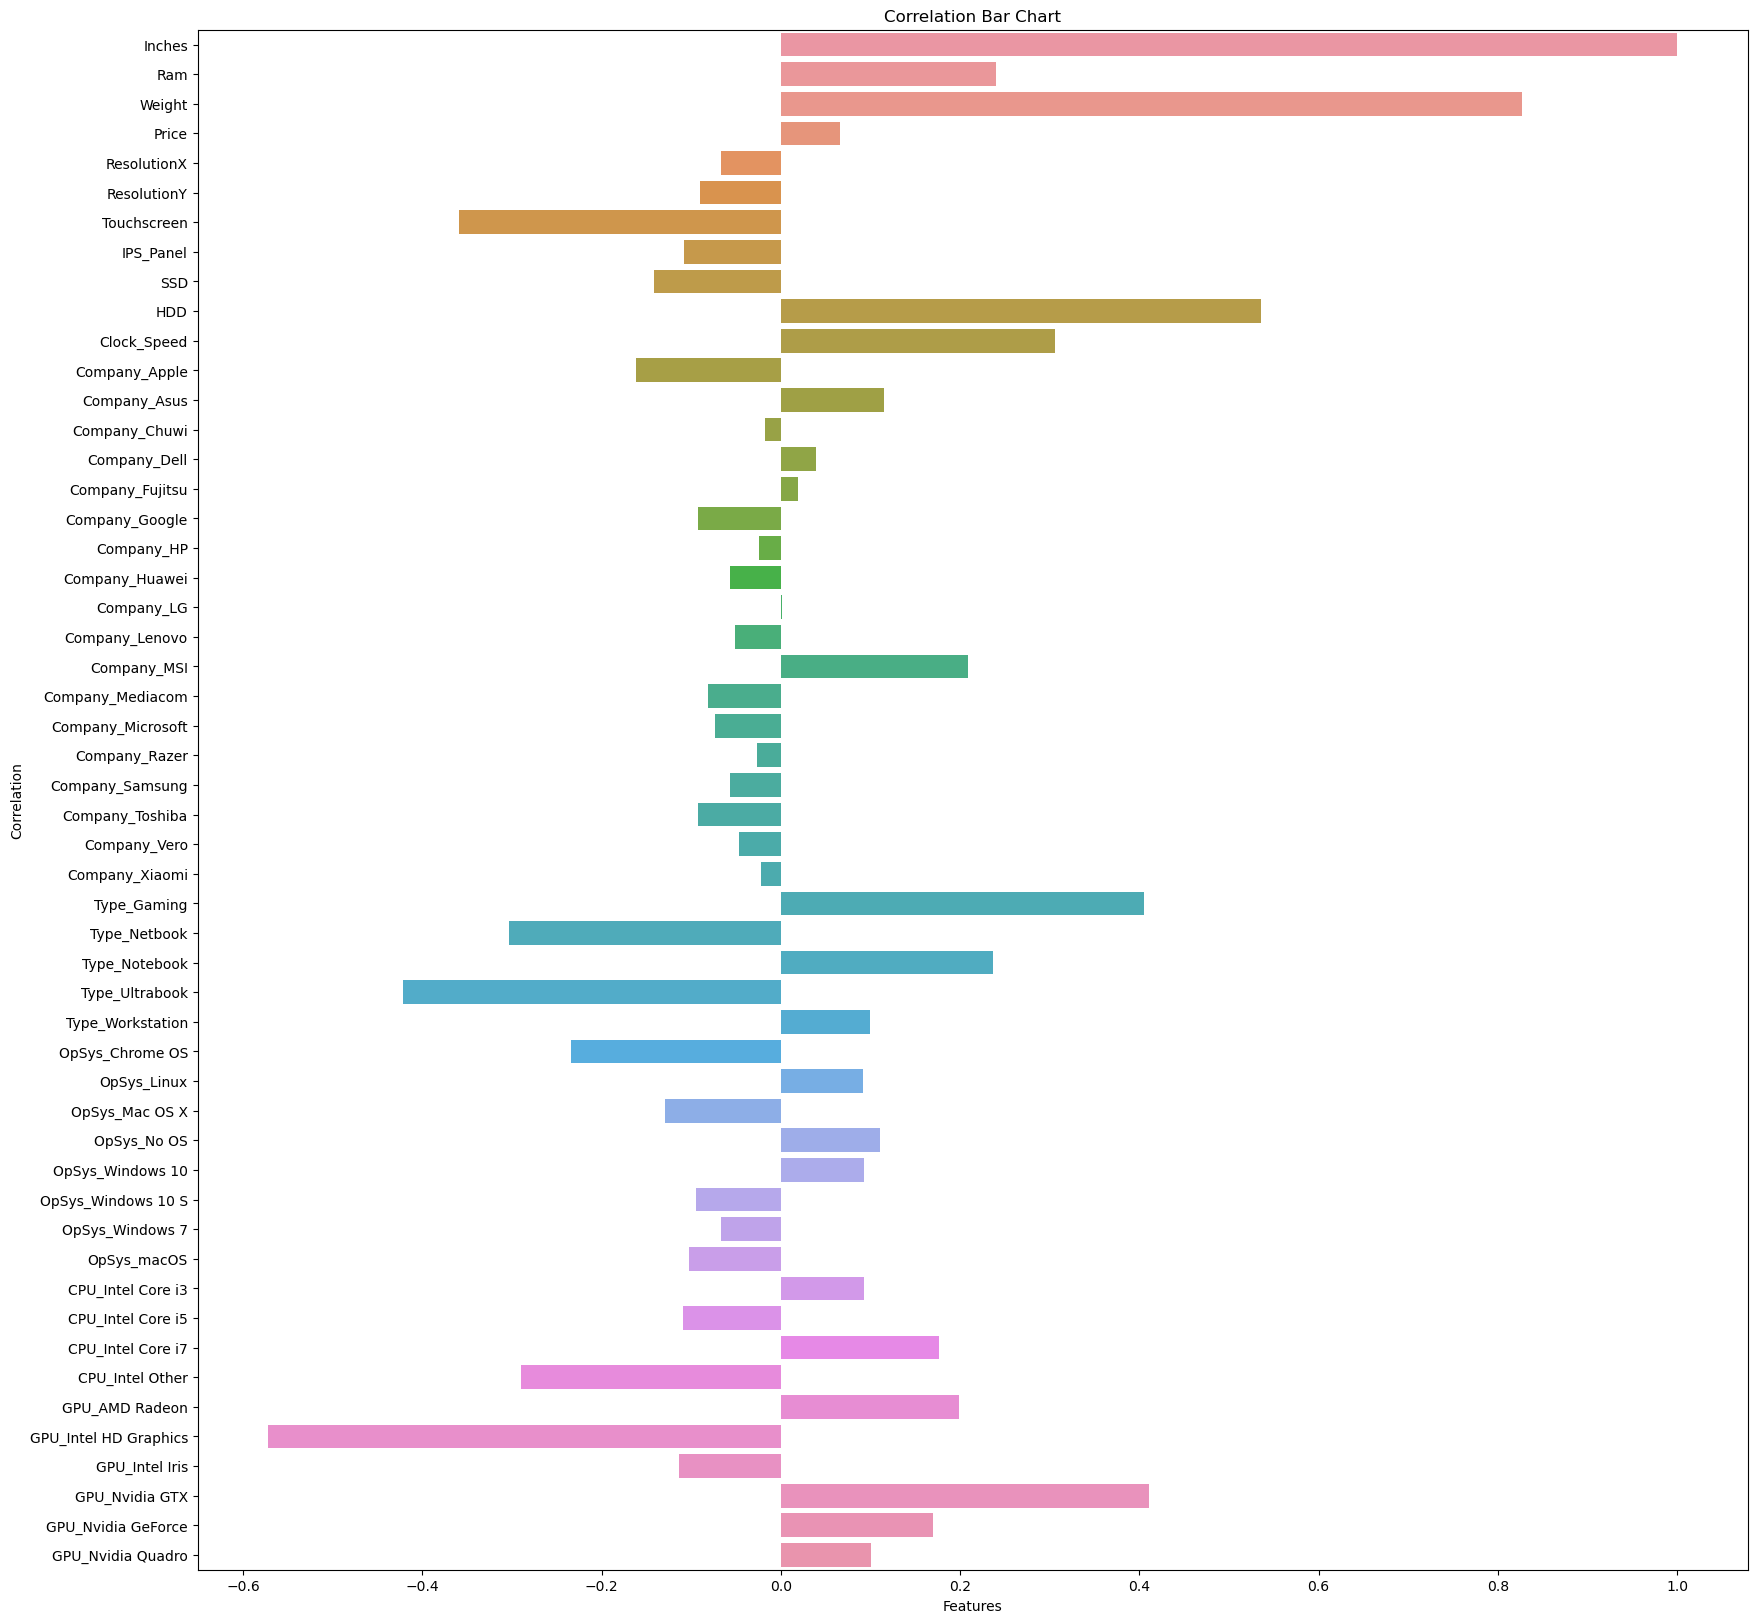

In [49]:
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.barplot(y=corr_matrix.columns, x=corr_matrix.iloc[0])
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation Bar Chart')
plt.show()


## Train & Test Data

In [50]:
x = df.drop('Price', axis=1)
y = df['Price']

In [51]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=43)

# Training Model

In [52]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Support Vector Machine' ]
traing_scores, testing_scores, mae, rmse = [], [], [], []

In [53]:
def Evaluate_Model(model):
   # Accuracy socre
   train_score = model.score(xtrain,ytrain)
   test_score = model.score(xtest,ytest)
   pred = model.predict(xtest)

   # MAE & MSE error
   model_mae = mean_absolute_error(ytest, pred)
   model_rmse = mean_squared_error(ytest, pred, squared=False)

   # Append
   traing_scores.append(train_score)
   testing_scores.append(test_score)
   mae.append(model_mae)
   rmse.append(model_rmse)

   # Print
   print(f'Train Accuracy\t: {train_score:.5f}')
   print(f'Test Accuracy\t: {test_score:.5f}')
   print(f'MAE\t\t: {model_mae:.4f}')
   print(f'RMSE\t\t: {model_rmse:.4f}')

# Linear Regression

In [54]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)
Evaluate_Model(reg)

Train Accuracy	: 0.80274
Test Accuracy	: 0.77294
MAE		: 255.9156
RMSE		: 386.6472


# Decision Tree

In [55]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
Evaluate_Model(dt)

Train Accuracy	: 0.99757
Test Accuracy	: 0.69179
MAE		: 253.3667
RMSE		: 450.4714


# KNN

In [56]:
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
Evaluate_Model(knn)

Train Accuracy	: 0.82115
Test Accuracy	: 0.61535
MAE		: 295.5127
RMSE		: 503.2454


# Random Forest

In [57]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
Evaluate_Model(rf)

Train Accuracy	: 0.97534
Test Accuracy	: 0.75806
MAE		: 216.1726
RMSE		: 399.1153


# Support Vector Machine

In [58]:
svm = SVR(kernel='linear')
svm.fit(xtrain,ytrain)
Evaluate_Model(svm)

Train Accuracy	: 0.70846
Test Accuracy	: 0.66599
MAE		: 296.5504
RMSE		: 468.9449


# DataFrame for Visualization

In [59]:
df_metrics = pd.DataFrame({'Model': models,'Training score':traing_scores,'Testing score':testing_scores,'MAE': mae, 'RMSE': rmse})
df_metrics

,Model,Training score,Testing score,MAE,RMSE
0,Logistic Regression,0.802739,0.772940,255.915618,386.647200
1,Decision Tree,0.997572,0.691791,253.366667,450.471408
2,Random Forest,0.821151,0.615346,295.512717,503.245386
3,KNN,0.975345,0.758060,216.172620,399.115269
4,Support Vector Machine,0.708465,0.665994,296.550393,468.944920


In [60]:
df_score = pd.melt(df_metrics, id_vars=['Model'], value_vars=['Training score','Testing score'], var_name='Type', value_name='Accuracy')
df_score

,Model,Type,Accuracy
0,Logistic Regression,Training score,0.802739
1,Decision Tree,Training score,0.997572
2,Random Forest,Training score,0.821151
3,KNN,Training score,0.975345
4,Support Vector Machine,Training score,0.708465
5,Logistic Regression,Testing score,0.772940
6,Decision Tree,Testing score,0.691791
7,Random Forest,Testing score,0.615346
8,KNN,Testing score,0.758060
9,Support Vector Machine,Testing score,0.665994


In [61]:
df_error = pd.melt(df_metrics, id_vars=['Model'], value_vars=['MAE','RMSE'], var_name='Type', value_name='Error')
df_error

,Model,Type,Error
0,Logistic Regression,MAE,255.915618
1,Decision Tree,MAE,253.366667
2,Random Forest,MAE,295.512717
3,KNN,MAE,216.172620
4,Support Vector Machine,MAE,296.550393
5,Logistic Regression,RMSE,386.647200
6,Decision Tree,RMSE,450.471408
7,Random Forest,RMSE,503.245386
8,KNN,RMSE,399.115269
9,Support Vector Machine,RMSE,468.944920


# Accuracy Score

<Axes: xlabel='Model', ylabel='Accuracy'>

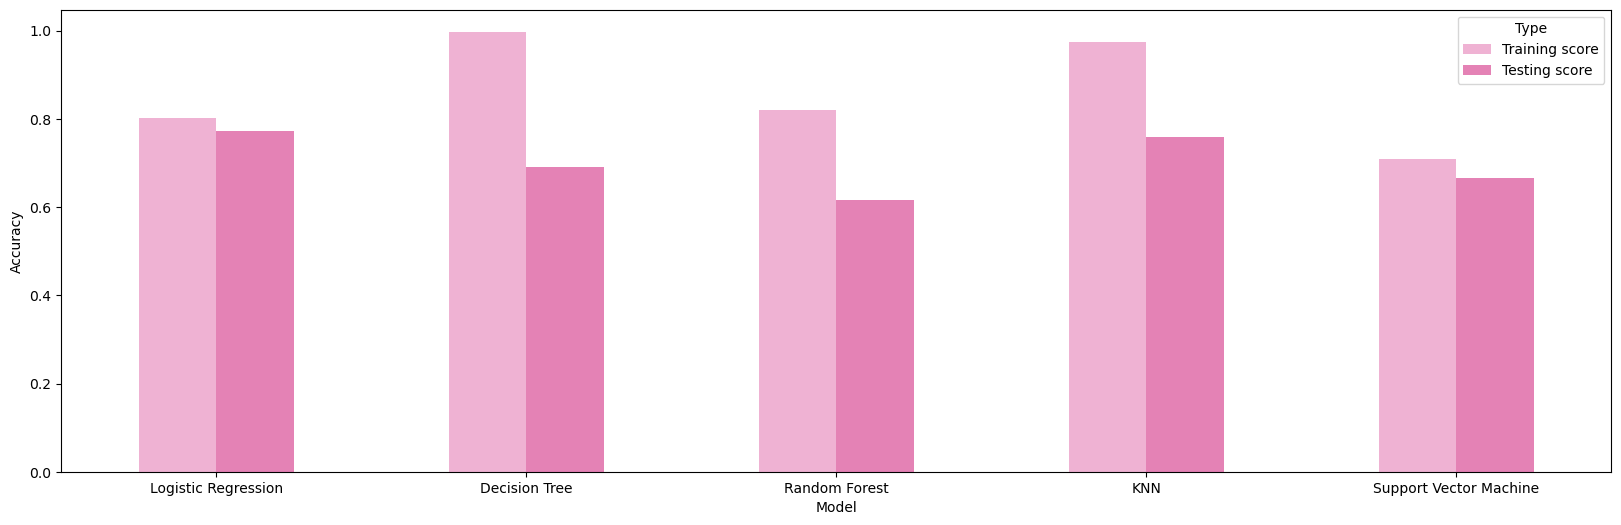

In [62]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_score, x='Model', y='Accuracy', hue='Type', width=0.5, palette=['#f9a8d4', '#f472b6'])

# MAE & MSE Error

<Axes: xlabel='Model', ylabel='Error'>

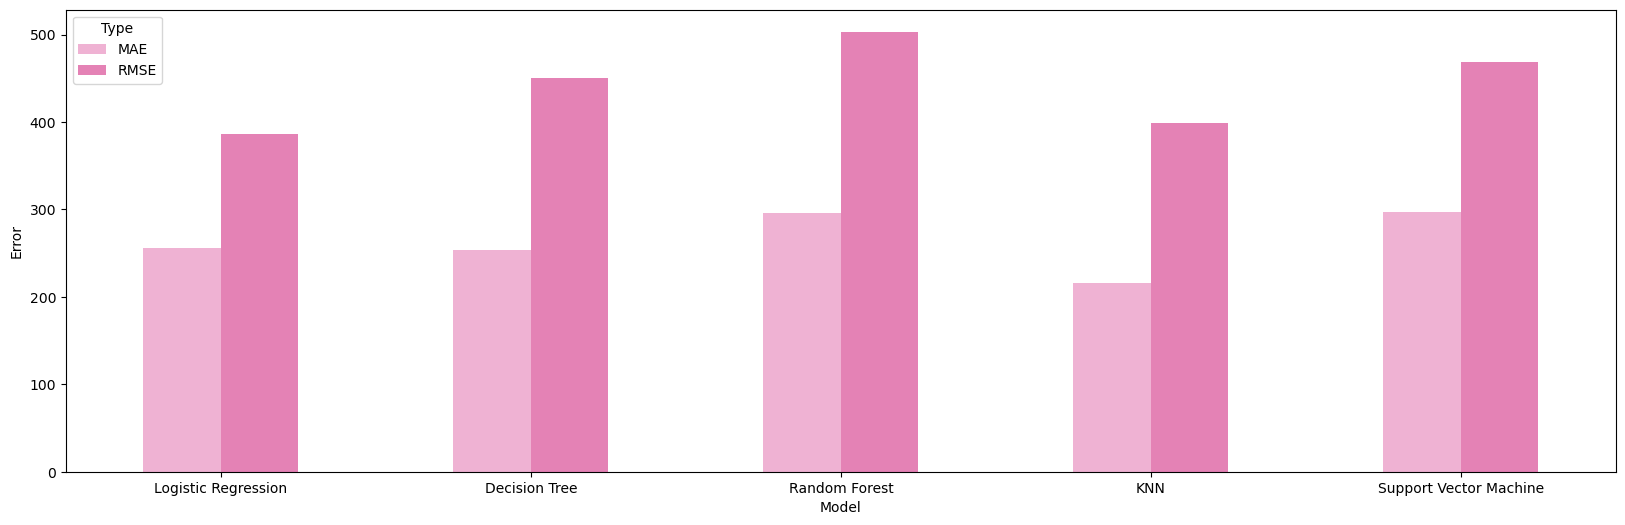

In [63]:
plt.figure(figsize=(20,6))
sns.barplot(data=df_error, x='Model', y='Error', hue='Type', width=0.5, palette=['#f9a8d4', '#f472b6'])

# Cross Validation

In [64]:
cv_scores = cross_validate(rf, x, y, cv=KFold(), scoring='r2')['test_score']
cv_scores

array([0.83929681, 0.8288999 , 0.81475219, 0.79491512, 0.75072636])

In [65]:
print(f"Min score: {cv_scores.min()}")
print(f"Max score: {cv_scores.max()}")
print(f"Mean score: {cv_scores.mean()}")

Min score: 0.7507263636043966
Max score: 0.8392968073740098
Mean score: 0.8057180754445273
